In [1]:
import time
import random
import matplotlib.pyplot as plt

In [2]:
# Sorting algorithms
def bubble_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
    return a

def insertion_sort(arr):
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a

def counting_sort(arr):
    a = arr.copy()
    if len(a) == 0:
        return a
    max_val = max(a)
    min_val = min(a)
    count = [0] * (max_val - min_val + 1)
    for num in a:
        count[num - min_val] += 1
    sorted_arr = []
    for i, c in enumerate(count):
        sorted_arr.extend([i + min_val] * c)
    return sorted_arr

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


In [3]:
# Benchmarking
algorithms = {
    "BubbleSort": bubble_sort,
    "InsertionSort": insertion_sort,
    "CountingSort": counting_sort,
    "MergeSort": merge_sort,
    "QuickSort": quick_sort
}

input_sizes = [100, 500, 1000, 2500, 5000, 7500, 10000]
results = {name: [] for name in algorithms}

for size in input_sizes:
    data = [random.randint(0, size) for _ in range(size)]
    for name, func in algorithms.items():
        start = time.time()
        func(data)
        end = time.time()
        results[name].append((end - start) * 1000)  # milliseconds

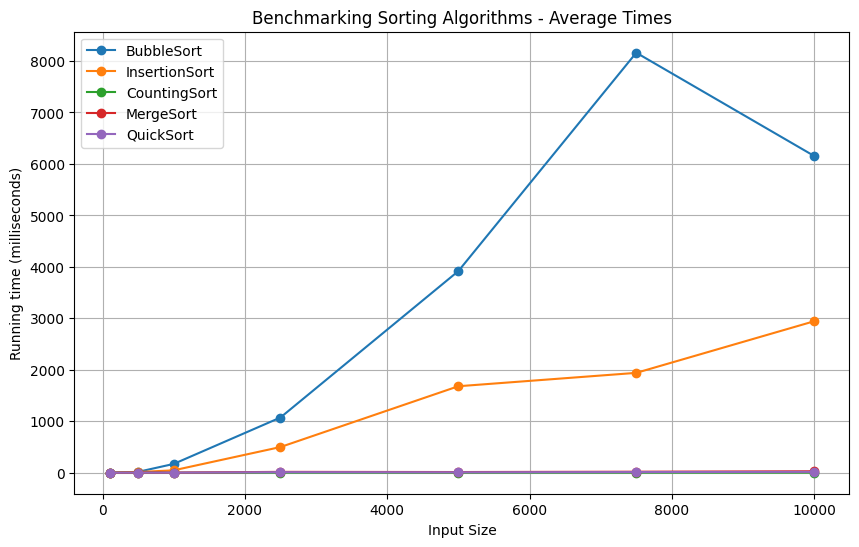

In [4]:
# Plotting
plt.figure(figsize=(10,6))
for name, times in results.items():
    plt.plot(input_sizes, times, marker='o', label=name)
plt.title("Benchmarking Sorting Algorithms - Average Times")
plt.xlabel("Input Size")
plt.ylabel("Running time (milliseconds)")
plt.legend()
plt.grid(True)
plt.show()